# GNN Explainer

This notebook is designed to visualize the results of the GNN Explainer.

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [108]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

In [109]:
%matplotlib inline

Configuring the experiment you want to visualize. These values should match the configuration:

> TODO: Unify configuration of experiments in yaml

In [3]:
logdir = '../log/'
expdir = 'syn2_base_h20_o20_explain'

In [4]:
# Load the produced masks

In [74]:
dirs = os.listdir(os.path.join(logdir, expdir))

In [48]:
masks = []
# This would print all the files and directories
for file in dirs:
    if file.split('.')[-1] == 'npy':
        print(file)
        masks.append(file)

masked_adjsyn2_base_h20_o20_explain.npy
masked_adj.npy


In [54]:
def show_adjacency_full(mask, ax=None):
    adj = np.load(os.path.join(logdir, expdir, mask), allow_pickle=True)
    if ax is None:
        plt.figure()
        plt.imshow(adj);
    else:
        ax.imshow(adj)
    return adj

In [55]:
def read_adjacency_full(mask, ax=None):
    adj = np.load(os.path.join(logdir, expdir, mask), allow_pickle=True)
    return adj

In [57]:
filt_adj = read_adjacency_full(masks[0])
@interact
def filter_adj(thresh=0.5):
    filt_adj[filt_adj<thresh] = 0
    return filt_adj

interactive(children=(FloatSlider(value=0.5, description='thresh', max=1.5, min=-0.5), Output()), _dom_classes…

Fraction-based threshold:

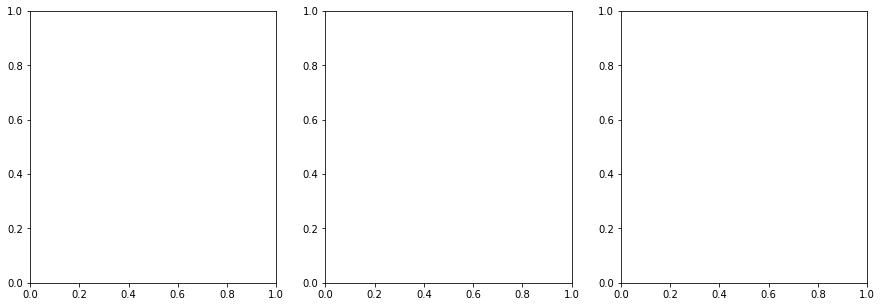

interactive(children=(FloatSlider(value=0.5, description='thresh', max=1.0, step=0.01), Output()), _dom_classe…

In [115]:
# EDIT THIS INDEX
MASK_IDX = 0
# EDIT THIS INDEX

m = masks[MASK_IDX]
adj = read_adjacency_full(m)


@interact(thresh=widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01))
def plot_interactive(thresh=0.5):
    filt_adj = read_adjacency_full(m)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    plt.title(str(m));

    # Full adjacency
    ax1.set_title('Full Adjacency mask')
    adj = show_adjacency_full(m, ax=ax1);
    
    # Filtered adjacency
    filt_adj[filt_adj<thresh] = 0
    ax2.set_title('Filtered Adjacency mask');
    ax2.imshow(filt_adj);
    
    # Plot subgraph
    ax3.set_title("Subgraph")
    G_ = nx.from_numpy_array(adj)
    G = nx.from_numpy_array(filt_adj)
    G.remove_nodes_from(list(nx.isolates(G)))
    nx.draw(G, ax=ax3)
    
    print("Removed {} edges -- K = {} remain.".format(G_.number_of_edges()-G.number_of_edges(), G.number_of_edges()))
    print("Removed {} nodes -- K = {} remain.".format(G_.number_of_nodes()-G.number_of_nodes(), G.number_of_nodes()))
